Devloping LSTM Model for Univariate Time Series Forcasting

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [ ]:
#preparing indepedent and dependent features
def prepare_data(timeseries_data , n_features):
  x,y = [],[]
  for i in range(len(timeseries_data)):
    #finding the end of this pattern
    end_ix = i + n_features

    if end_ix > len(timeseries_data)-1:
      break;
    seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  return np.array(x), np.array(y);



In [ ]:
print(x),print(y)

[[[110]
  [125]
  [130]]

 [[125]
  [130]
  [146]]

 [[130]
  [146]
  [158]]

 [[146]
  [158]
  [171]]

 [[158]
  [171]
  [180]]

 [[171]
  [180]
  [190]]]
[146 158 171 180 190 210]


(None, None)

In [ ]:
x.shape

(6, 3)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1

x = x.reshape((x.shape[0], x.shape[1], n_features))

# Now Building the LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(50,activation='relu', return_sequences=True , input_shape= (n_step, n_features)))
model.add(LSTM(50,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x,y , epochs = 300, verbose = 1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 31311.9277
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 30675.7188
Epoch 3/300
1/1 [==============================] - 0s 16ms/step - loss: 30059.1621
Epoch 4/300
1/1 [==============================] - 0s 16ms/step - loss: 29509.9473
Epoch 5/300
1/1 [==============================] - 0s 15ms/step - loss: 29021.7734
Epoch 6/300
1/1 [==============================] - 0s 18ms/step - loss: 28565.3652
Epoch 7/300
1/1 [==============================] - 0s 17ms/step - loss: 28115.3438
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 27655.8203
Epoch 9/300
1/1 [==============================] - 0s 18ms/step - loss: 27175.3184
Epoch 10/300
1/1 [==============================] - 0s 18ms/step - loss: 26661.1152
Epoch 11/300
1/1 [==============================] - 0s 15ms/step - loss: 26127.8906
Epoch 12/300
1/1 [==============================] - 0s 16ms/step - loss: 25585.7168
Epo

In [ ]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_step, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_step, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1

print(lst_output)

[223.79442]
1 day input [196.         210.         223.79441833]
1 day output [[235.96489]]
2 day input [210.         223.79441833 235.96488953]
2 day output [[250.80138]]
3 day input [223.79442 235.96489 250.80138]
3 day output [[265.28647]]
4 day input [235.96489 250.80138 265.28647]
4 day output [[279.83072]]
5 day input [250.80138 265.28647 279.83072]
5 day output [[295.81903]]
6 day input [265.28647 279.83072 295.81903]
6 day output [[311.81497]]
7 day input [279.83072 295.81903 311.81497]
7 day output [[328.40958]]
8 day input [295.81903 311.81497 328.40958]
8 day output [[345.91174]]
9 day input [311.81497 328.40958 345.91174]
9 day output [[363.7466]]
[223.79442, 235.96489, 250.80138, 265.28647, 279.83072, 295.81903, 311.81497, 328.40958, 345.91174, 363.7466]


In [ ]:
lst_output

[223.79442,
 235.96489,
 250.80138,
 265.28647,
 279.83072,
 295.81903,
 311.81497,
 328.40958,
 345.91174,
 363.7466]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

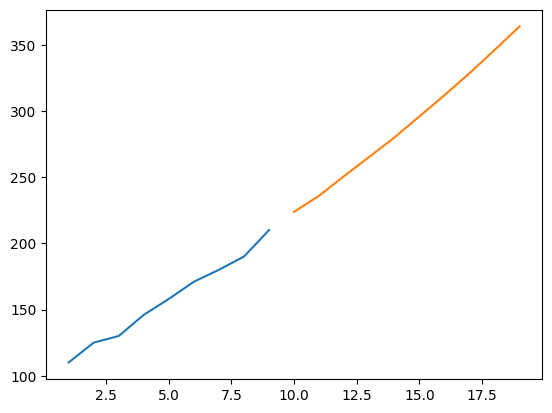

In [ ]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)